In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_excel('Student-Employability-Datasets.xlsx')
data.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [4]:
data.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   Student Performance Rating  2982 non-null   int64 
 9   CLASS                       2982 non-null   object
dtypes: int64(8), object(2)
memory usage: 233.1+ KB


Text(0.5, 1.0, 'Procent class')

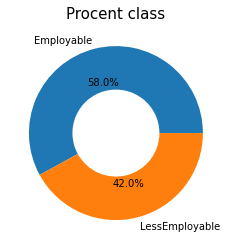

In [6]:
count_class=data.groupby('CLASS',as_index=False).aggregate({"Name of Student":"count"})
count_class=count_class.rename(columns={'Name of Student':"count_student"})

# Визуализация
fig, ax = plt.subplots()
ax.pie(count_class.count_student, labels=count_class.CLASS, wedgeprops=dict(width=0.5),autopct='%1.1f%%')
plt.title('Procent class', fontsize=15)                     

# Внешний вид

In [7]:
data_app=data.groupby(['GENERAL APPEARANCE','CLASS'],as_index=False).aggregate({"Name of Student":"count"})
data_app=data_app.rename(columns={'Name of Student':"count_student"})
data_app

,GENERAL APPEARANCE,CLASS,count_student
0,2,LessEmployable,16
1,3,Employable,214
2,3,LessEmployable,147
3,4,Employable,758
4,4,LessEmployable,718
5,5,Employable,757
6,5,LessEmployable,372


<Figure size 432x432 with 0 Axes>

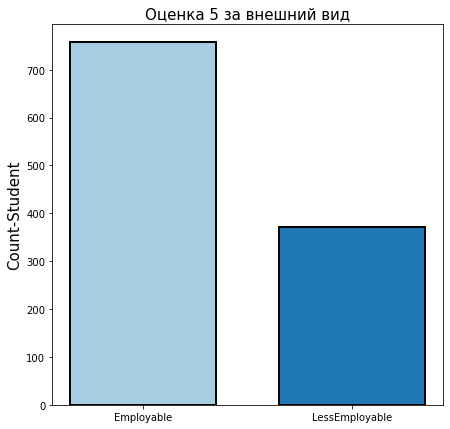

In [8]:
plt.figure(figsize=(6, 6))
x=data_app['CLASS'].loc[data_app['GENERAL APPEARANCE'] == 5]
y=data_app['count_student'].loc[data_app['GENERAL APPEARANCE'] == 5]

plt.figure(figsize=[7, 7])
col_map = plt.get_cmap('Paired')

plt.bar(x, y, width=0.7, color=col_map.colors, edgecolor='k', 
        linewidth=2)

plt.title('Оценка 5 за внешний вид', fontsize=15)
plt.ylabel('Count-Student', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Процентное соотношение студентов полуивших оценку 4 за внешний вид')

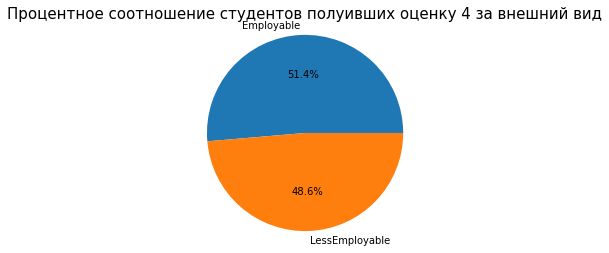

In [9]:
data_app_4=data_app[['count_student','CLASS']].loc[data_app['GENERAL APPEARANCE'] == 4]

# Визуализация
fig, ax = plt.subplots()
ax.pie(data_app_4['count_student'], labels=data_app_4['CLASS'], autopct='%1.1f%%')
ax.axis("equal")
plt.title('Процентное соотношение студентов полуивших оценку 4 за внешний вид', fontsize=15)

In [10]:
print('1) Студент, который получил 2 за внешний вид, 100% он не получает работу')
print('2) Студенты получившие 4 за внешний вид, половина получает работу, половина нет')
print(f'3) {round((y[5]/sum(y)*100),0)} % из получивших 5 за внешний вид, получают работу')

1) Студент, который получил 2 за внешний вид, 100% он не получает работу
2) Студенты получившие 4 за внешний вид, половина получает работу, половина нет
3) 67.0 % из получивших 5 за внешний вид, получают работу


# Манера общения

In [11]:
data_speak=data.groupby(['MANNER OF SPEAKING','CLASS'],as_index=False).aggregate({"Name of Student":"count"})
data_speak=data_speak.rename(columns={'Name of Student':"count_student"})
data_speak

,MANNER OF SPEAKING,CLASS,count_student
0,2,LessEmployable,48
1,3,Employable,457
2,3,LessEmployable,445
3,4,Employable,794
4,4,LessEmployable,584
5,5,Employable,478
6,5,LessEmployable,176


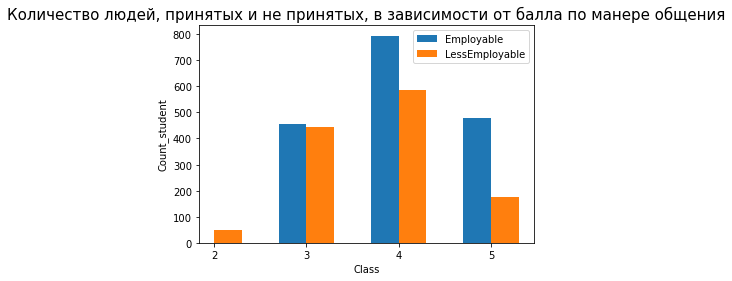

In [12]:
Employable=data_speak.loc[data_speak['CLASS'] == 'Employable']
LessEmployable=data_speak.loc[data_speak['CLASS'] == 'LessEmployable']
width = 0.30
plt.bar(Employable['MANNER OF SPEAKING']-0.15, Employable['count_student'], width, label='Employable')
plt.bar(LessEmployable['MANNER OF SPEAKING']+0.15, LessEmployable['count_student'], width, label='LessEmployable')
plt.xticks(LessEmployable['MANNER OF SPEAKING'], ['2', '3', '4', '5'])
plt.xlabel("Class")
plt.ylabel("Count_student")
plt.legend(["Employable", "LessEmployable"])
plt.title('Количество людей, принятых и не принятых, в зависимости от балла по манере общения', fontsize=15)
plt.show()

In [13]:
y=data_speak['count_student'].loc[data_speak['MANNER OF SPEAKING'] == 5]

In [14]:
print('1) Студент, который получил 2 за манеру общения, 100% не получает работу')
print('2) Студенты получившие 3 за манеру общения, половина получает работу, половина нет')
print(f'3) {round((y[5]/sum(y)*100),0)} % из получивших 5 за манеру общения, получают работу')

1) Студент, который получил 2 за манеру общения, 100% не получает работу
2) Студенты получившие 3 за манеру общения, половина получает работу, половина нет
3) 73.0 % из получивших 5 за манеру общения, получают работу


# Физические кондиции

In [15]:
data_phy=data.groupby(['PHYSICAL CONDITION','CLASS'],as_index=False).aggregate({"Name of Student":"count"})
data_phy=data_phy.rename(columns={'Name of Student':"count_student"})
data_phy

,PHYSICAL CONDITION,CLASS,count_student
0,2,Employable,17
1,2,LessEmployable,15
2,3,Employable,394
3,3,LessEmployable,378
4,4,Employable,758
5,4,LessEmployable,667
6,5,Employable,560
7,5,LessEmployable,193


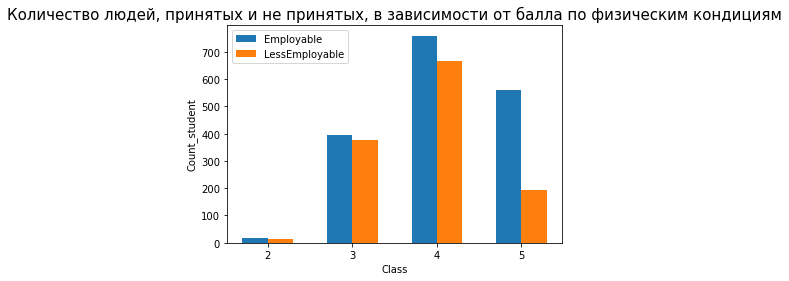

In [16]:
Employable=data_phy.loc[data_phy['CLASS'] == 'Employable']
LessEmployable=data_phy.loc[data_phy['CLASS'] == 'LessEmployable']
width = 0.30
plt.bar(Employable['PHYSICAL CONDITION']-0.15, Employable['count_student'], width, label='Employable')
plt.bar(LessEmployable['PHYSICAL CONDITION']+0.15, LessEmployable['count_student'], width, label='LessEmployable')
plt.xticks(LessEmployable['PHYSICAL CONDITION'], ['2', '3', '4', '5'])
plt.xlabel("Class")
plt.ylabel("Count_student")
plt.legend(["Employable", "LessEmployable"])
plt.title('Количество людей, принятых и не принятых, в зависимости от балла по физическим кондициям', fontsize=15)
plt.show()

In [17]:
y=data_phy['count_student'].loc[data_phy['PHYSICAL CONDITION'] == 5]

In [18]:
print(f'1) {round((y[6]/sum(y)*100),0)} % из получивших 5 за хорошие физические кондиции, получают работу')
print('2) Студенты получившие 2 или 3 или 4, за физические кондиции, примерно половина получает работу, половина нет')

1) 74.0 % из получивших 5 за хорошие физические кондиции, получают работу
2) Студенты получившие 2 или 3 или 4, за физические кондиции, примерно половина получает работу, половина нет


# Умственная активность

In [19]:
data_alert=data.groupby(['MENTAL ALERTNESS','CLASS'],as_index=False).aggregate({"Name of Student":"count"})
data_alert=data_alert.rename(columns={'Name of Student':"count_student"})
data_alert

,MENTAL ALERTNESS,CLASS,count_student
0,2,Employable,16
1,2,LessEmployable,50
2,3,Employable,410
3,3,LessEmployable,361
4,4,Employable,692
5,4,LessEmployable,661
6,5,Employable,611
7,5,LessEmployable,181


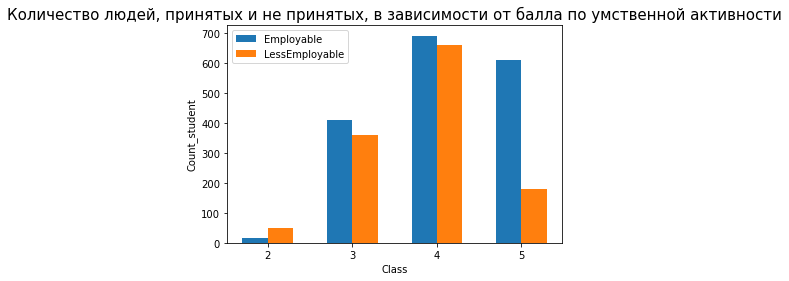

In [20]:
Employable=data_alert.loc[data_alert['CLASS'] == 'Employable']
LessEmployable=data_alert.loc[data_alert['CLASS'] == 'LessEmployable']
width = 0.30
plt.bar(Employable['MENTAL ALERTNESS']-0.15, Employable['count_student'], width, label='Employable')
plt.bar(LessEmployable['MENTAL ALERTNESS']+0.15, LessEmployable['count_student'], width, label='LessEmployable')
plt.xticks(LessEmployable['MENTAL ALERTNESS'], ['2', '3', '4', '5'])
plt.xlabel("Class")
plt.ylabel("Count_student")
plt.legend(["Employable", "LessEmployable"])
plt.title('Количество людей, принятых и не принятых, в зависимости от балла по умственной активности', fontsize=15)
plt.show()

In [21]:
y=data_alert['count_student'].loc[data_alert['MENTAL ALERTNESS'] == 5]

In [22]:
print(f'1) {round((y[6]/sum(y)*100),0)} % из получивших 5 за умственную активность, получают работу')
print('2) Студенты получившие 3 или 4, за умственную активность, примерно половина получает работу, половина нет')

1) 77.0 % из получивших 5 за умственную активность, получают работу
2) Студенты получившие 3 или 4, за умственную активность, примерно половина получает работу, половина нет


# Уверенность в себе

In [23]:
data_condi=data.groupby(['SELF-CONFIDENCE','CLASS'],as_index=False).aggregate({"Name of Student":"count"})
data_condi=data_condi.rename(columns={'Name of Student':"count_student"})
data_condi

,SELF-CONFIDENCE,CLASS,count_student
0,2,Employable,17
1,2,LessEmployable,16
2,3,Employable,543
3,3,LessEmployable,475
4,4,Employable,578
5,4,LessEmployable,535
6,5,Employable,591
7,5,LessEmployable,227


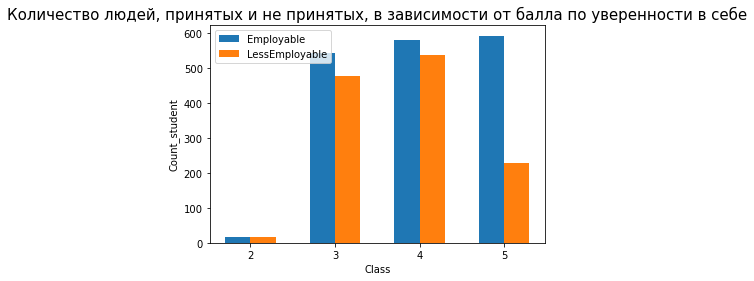

In [24]:
Employable=data_condi.loc[data_condi['CLASS'] == 'Employable']
LessEmployable=data_condi.loc[data_condi['CLASS'] == 'LessEmployable']
width = 0.30
plt.bar(Employable['SELF-CONFIDENCE']-0.15, Employable['count_student'], width, label='Employable')
plt.bar(LessEmployable['SELF-CONFIDENCE']+0.15, LessEmployable['count_student'], width, label='LessEmployable')
plt.xticks(LessEmployable['SELF-CONFIDENCE'], ['2', '3', '4', '5'])
plt.xlabel("Class")
plt.ylabel("Count_student")
plt.legend(["Employable", "LessEmployable"])
plt.title('Количество людей, принятых и не принятых, в зависимости от балла по уверенности в себе', fontsize=15)
plt.show()

In [25]:
y=data_condi['count_student'].loc[data_condi['SELF-CONFIDENCE'] == 5]

In [26]:
print(f'1) {round((y[6]/sum(y)*100),0)} % из получивших 5 за уверенность в себе, получают работу')
print('2) Студенты получившие 2 или 3 или 4, за уверенность в себе, примерно половина получает работу, половина нет')

1) 72.0 % из получивших 5 за уверенность в себе, получают работу
2) Студенты получившие 2 или 3 или 4, за уверенность в себе, примерно половина получает работу, половина нет


# Спосбоность излагать идеи

In [27]:
data_abi=data.groupby(['ABILITY TO PRESENT IDEAS','CLASS'],as_index=False).aggregate({"Name of Student":"count"})
data_abi=data_abi.rename(columns={'Name of Student':"count_student"})
data_abi

,ABILITY TO PRESENT IDEAS,CLASS,count_student
0,2,Employable,49
1,2,LessEmployable,33
2,3,Employable,474
3,3,LessEmployable,424
4,4,Employable,828
5,4,LessEmployable,667
6,5,Employable,378
7,5,LessEmployable,129


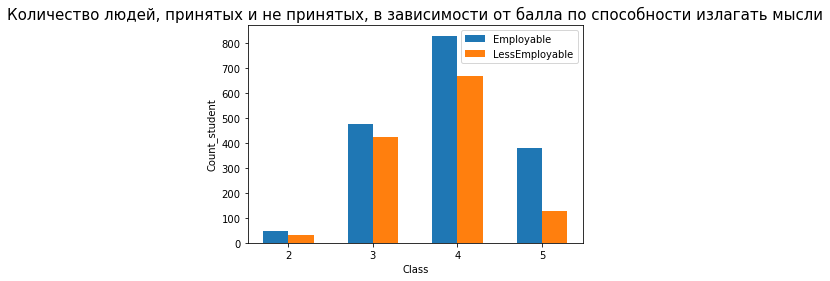

In [28]:
Employable=data_abi.loc[data_abi['CLASS'] == 'Employable']
LessEmployable=data_abi.loc[data_abi['CLASS'] == 'LessEmployable']
width = 0.30
plt.bar(Employable['ABILITY TO PRESENT IDEAS']-0.15, Employable['count_student'], width, label='Employable')
plt.bar(LessEmployable['ABILITY TO PRESENT IDEAS']+0.15, LessEmployable['count_student'], width, label='LessEmployable')
plt.xticks(LessEmployable['ABILITY TO PRESENT IDEAS'], ['2', '3', '4', '5'])
plt.xlabel("Class")
plt.ylabel("Count_student")
plt.legend(["Employable", "LessEmployable"])
plt.title('Количество людей, принятых и не принятых, в зависимости от балла по способности излагать мысли', fontsize=15)
plt.show()

In [29]:
y=data_abi['count_student'].loc[data_abi['ABILITY TO PRESENT IDEAS'] == 5]

In [30]:
print(f'1) {round((y[6]/sum(y)*100),0)} % из получивших 5 за способность излагать мысли, получают работу')

1) 75.0 % из получивших 5 за способность излагать мысли, получают работу


# КОММУНИКАТИВНЫЕ НАВЫКИ

In [31]:
data_com=data.groupby(['COMMUNICATION SKILLS','CLASS'],as_index=False).aggregate({"Name of Student":"count"})
data_com=data_com.rename(columns={'Name of Student':"count_student"})
data_com

,COMMUNICATION SKILLS,CLASS,count_student
0,2,Employable,81
1,2,LessEmployable,83
2,3,Employable,708
3,3,LessEmployable,668
4,4,Employable,745
5,4,LessEmployable,408
6,5,Employable,195
7,5,LessEmployable,94


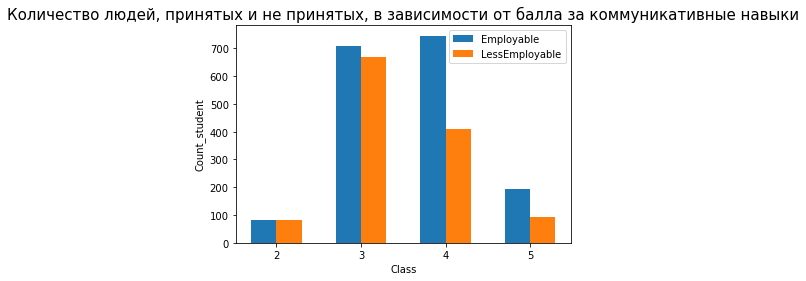

In [32]:
Employable=data_com.loc[data_com['CLASS'] == 'Employable']
LessEmployable=data_com.loc[data_com['CLASS'] == 'LessEmployable']
width = 0.30
plt.bar(Employable['COMMUNICATION SKILLS']-0.15, Employable['count_student'], width, label='Employable')
plt.bar(LessEmployable['COMMUNICATION SKILLS']+0.15, LessEmployable['count_student'], width, label='LessEmployable')
plt.xticks(LessEmployable['COMMUNICATION SKILLS'], ['2', '3', '4', '5'])
plt.xlabel("Class")
plt.ylabel("Count_student")
plt.legend(["Employable", "LessEmployable"])
plt.title('Количество людей, принятых и не принятых, в зависимости от балла за коммуникативные навыки', fontsize=15)
plt.show()

In [33]:
y_5=data_com['count_student'].loc[data_com['COMMUNICATION SKILLS'] == 5]

In [34]:
y_4=data_com['count_student'].loc[data_com['COMMUNICATION SKILLS'] == 4]

In [35]:
print(f'1) {round((y_5[6]/sum(y_5)*100),0)} % из получивших 5 за коммуникативные способности, получают работу')
print(f'2) {round((y_4[4]/sum(y_4)*100),0)} % из получивших 4 за коммуникативные способности, получают работу')
print('3) Студенты получившие 2 или 3, за коммуникативные способности, примерно половина получает работу, половина нет')

1) 67.0 % из получивших 5 за коммуникативные способности, получают работу
2) 65.0 % из получивших 4 за коммуникативные способности, получают работу
3) Студенты получившие 2 или 3, за коммуникативные способности, примерно половина получает работу, половина нет


# Рейтинг успеваемости

In [36]:
data_perf=data.groupby(['Student Performance Rating','CLASS'],as_index=False).aggregate({"Name of Student":"count"})
data_perf=data_perf.rename(columns={'Name of Student':"count_student"})
data_perf

,Student Performance Rating,CLASS,count_student
0,3,Employable,215
1,3,LessEmployable,146
2,4,Employable,244
3,4,LessEmployable,195
4,5,Employable,1270
5,5,LessEmployable,912


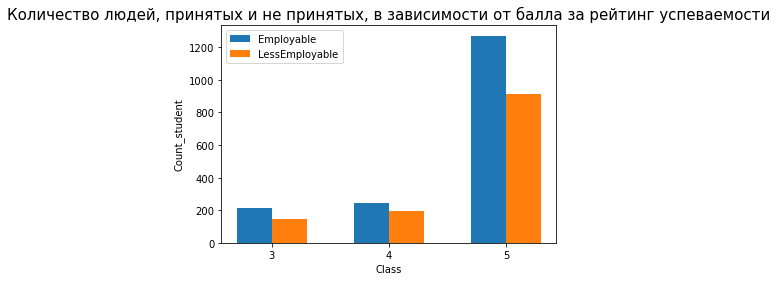

In [37]:
Employable=data_perf.loc[data_perf['CLASS'] == 'Employable']
LessEmployable=data_perf.loc[data_perf['CLASS'] == 'LessEmployable']
width = 0.30
plt.bar(Employable['Student Performance Rating']-0.15, Employable['count_student'], width, label='Employable')
plt.bar(LessEmployable['Student Performance Rating']+0.15, LessEmployable['count_student'], width, label='LessEmployable')
plt.xticks(LessEmployable['Student Performance Rating'], ['3', '4', '5'])
plt.xlabel("Class")
plt.ylabel("Count_student")
plt.legend(["Employable", "LessEmployable"])
plt.title('Количество людей, принятых и не принятых, в зависимости от балла за рейтинг успеваемости', fontsize=15)
plt.show()

In [38]:
y=data_perf['count_student'].loc[data_perf['Student Performance Rating'] == 5]

In [39]:
print(f'2) {round((y_4[4]/sum(y_4)*100),0)} % из получивших 5 за успеваемость, получают работу')
print('3) Студенты получившие 3 или 4 за успеваемость, примерно половина получает работу, половина нет')

2) 65.0 % из получивших 5 за успеваемость, получают работу
3) Студенты получившие 3 или 4 за успеваемость, примерно половина получает работу, половина нет


# Модели для обучения

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data['CLASS'])
data['Class_int']=le.transform(data['CLASS'])
data.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,Class_int
0,Student 1,4,5,4,5,5,5,5,5,Employable,0
1,Student 2,4,4,4,4,4,4,3,5,Employable,0
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable,1
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable,1
4,Student 5,4,4,3,3,4,4,3,5,Employable,0


In [41]:
# Датасет для обучения

data_model=data.loc[:2900, [data.columns[1],data.columns[2],data.columns[3],
                              data.columns[4],data.columns[5],data.columns[6],data.columns[7],
                           data.columns[8],data.columns[10]]]

# Датасет для прогноза и определения метрик для данных, которые не были в обучающей выборке и тестовой
data_predict=data.loc[2900:, [data.columns[1],data.columns[2],data.columns[3],
                              data.columns[4],data.columns[5],data.columns[6],data.columns[7],
                           data.columns[8],data.columns[10]]]
data_model.head()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,Class_int
0,4,5,4,5,5,5,5,5,0
1,4,4,4,4,4,4,3,5,0
2,4,3,3,3,3,3,2,5,1
3,3,3,3,2,3,3,3,5,1
4,4,4,3,3,4,4,3,5,0


# Модели

In [42]:
# Отбор признаков
# from itertools import combinations
# name_columns=list(data_model.iloc[:, :-1].columns)
# feature = sum([list(map(list, combinations(name_columns, i))) for i in range(len(name_columns) + 1)], [])
# feature.pop(0)
# len(feature)

In [56]:
# Создаем тренировочные и тестовые выборки 
from sklearn.model_selection import train_test_split
x= data_model.iloc[:, :-1].values
y = data_model['Class_int'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Модель опорных векторов (SVM)

In [57]:
from sklearn.svm import SVC
# Объявляем и обучаем модель 
svclassifier = SVC(kernel='poly').fit(X_train, y_train)

In [58]:
# Прогноз
X_new=data_predict.iloc[:, :-1]
y_pred = svclassifier.predict(X_new)

# Метрики для модели SVM

In [59]:
from sklearn import metrics
y_true=data_predict['Class_int']

print(round(metrics.accuracy_score(y_true, y_pred)*100,2),"% Процент совпадений")
print(round(metrics.roc_auc_score(y_true, y_pred),2),"ROC-AUC")


87.8 % Процент совпадений
0.85 ROC-AUC


# Модель K ближайших соседей KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [61]:
# Прогноз
X_new=data_predict.iloc[:, :-1]
y_pred = knnclassifier.predict(X_new)

# Метрики для модели KNN

In [62]:
print(round(metrics.accuracy_score(y_true, y_pred)*100,2),"% Процент совпадений")
print(round(metrics.roc_auc_score(y_true, y_pred),2),"ROC-AUC")

90.24 % Процент совпадений
0.91 ROC-AUC


# Модель Дерево решений Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
# Объявляем и обучаем модель 
decclassifier = DecisionTreeClassifier().fit(X_train, y_train)

In [64]:
# Прогноз
X_new=data_predict.iloc[:, :-1]
y_pred = decclassifier.predict(X_new)

# Метрики для модели Decision Tree

In [65]:
print(round(metrics.accuracy_score(y_true, y_pred)*100,2),"% Процент совпадений")
print(round(metrics.roc_auc_score(y_true, y_pred),2),"ROC-AUC")

91.46 % Процент совпадений
0.9 ROC-AUC


# Модель Случайный лес RandomForest

In [66]:
from sklearn.ensemble import RandomForestClassifier
# Объявляем и обучаем модель 
rfc = RandomForestClassifier().fit(X_train, y_train)

In [67]:
# Прогноз
X_new=data_predict.iloc[:, :-1]
y_pred = rfc.predict(X_new)

# Метрики для модели RandomForest

In [69]:
print(round(metrics.accuracy_score(y_true, y_pred)*100,2),"% Процент совпадений")
print(round(metrics.roc_auc_score(y_true, y_pred),2),"ROC-AUC")

92.68 % Процент совпадений
0.92 ROC-AUC


# Вывод
Наилучшее качество модели, получилось на модели RandomForest:

Метрики качества:

1) 92.68 % Процент совпадений

2) 0.92 ROC-AUC